In [10]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop




# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [ ]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [ ]:
#y.shape

In [ ]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [6]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0002.jpg'))

In [4]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [5]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [3]:
# #y
# y_list = []
# for image in sorted(os.listdir('Data/y_variables/Unruled')):
#     file='Data/y_variables/Unruled/'+ str(image)
#     y_image = np.array(Image.open(file))
#     y_image = y_image.reshape(*y_image.shape,1)
#     y_list.append(y_image)
                  
# y = np.array(y_list)  
# y.shape

(669, 500, 400, 1)

(10, 500, 400, 1)

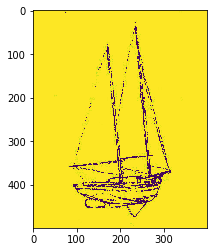

In [63]:
#y ONLY 10 IMAGES
y_list = []
for image in sorted(os.listdir('Data/y_variables/Unruled')):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape, 1)
    y_list.append(y_image)
    if len(y_list) == 10:
        break

plt.imshow(y_list[0].reshape(500,400))                
y = np.array(y_list)  
y.shape

In [51]:
# #X

# X_list = []
# for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
#     file = 'Data/X_variables/computer_generated_lines/'+str(image)
#     X_image = np.array(Image.open(file))
#     X_image = X_image.reshape(*X_image.shape,1)
#     X_list.append(X_image)
    
# X = np.array(X_list)
# X.shape

(10, 500, 400, 1)

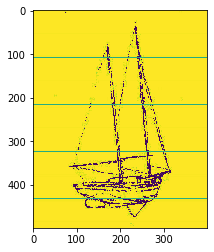

In [64]:
#X FIRST 10 IMAGES

X_list = []
for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape, 1)
    X_list.append(X_image)
    if len(X_list) == 10:
        break


plt.imshow(X_list[0].reshape(500,400))    
X = np.array(X_list)
X.shape

In [136]:
X.shape, y.shape

((10, 500, 400, 1), (10, 500, 400, 1))

In [ ]:
plt.imshow(y[1,:,:,:].reshape(500,400))

In [8]:
tf.__version__

'2.3.0'

# 3 SELECTIONAL AUTOENCODER model
Selectional Auto-Encoder (SAE)
The hierarchy of layers of our SAE consists of a series of convolutional plus pooling layers, until an intermediate layer in which meaningful representations of the input are attained. As these layers are applied, filters are able to relate parts of the image that were initially far apart. It then follows a series of convolutional plus upsampling layers that reconstruct the image up to the same 200 input size. The last layer consists of a set of neurons with sigmoid activation that predict a value in the range of [0, 1], depending on the selectional level for the corresponding input feature. 

200 epochs maximum
patience = 5
used grid search to tune hyper parameters?
batch size = 8
results + F measure (F score?)



In [122]:
# input_img = image_to_predict.reshape(*image_to_predict.shape,1)# adapt this if using `channels_first` image data format
# input_img.shape


In [138]:
#SET UP TENSORBOARD



In [141]:
# *SET UP TENSORBOARD**

#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)
#model_cp = ModelCheckpoint(filepath=checkpoint_filepath)

#METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='ROC', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
# METRICS = [ metrics.Accuracy(name='ACCURACY'),
#              metrics.AUC(name='AUC', curve='ROC', multi_label=False)]


METRICS = [ metrics.Accuracy(name='ACCURACY')]



#model.compile(loss = 'mse', optimizer = 'adam', metrics=METRICS)


#updated tensorboard
checkpoint_filepath = './tmp/checkpoint'
tensorboard = TensorBoard(log_dir="./logs",
    histogram_freq=2,
    write_graph=True,
    write_images=True,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None)

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath, monitor = 'loss', save_best_only=True)

early_stopping = EarlyStopping(monitor='loss',patience=10)

In [156]:
# MODEL A. straight from the keras website (used to model the below one) **DOESNT WORK**

 
input_img = Input(shape=(500,400,1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
#autoencoder.compile(optimizer='adam', loss='mse', metrics=METRICS)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') #original compile from tensorflow


Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 500, 400, 16)      160       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 250, 200, 16)      0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 250, 200, 8)       1160      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 125, 100, 8)       0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 125, 100, 8)       584       
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 125, 100, 16)    

In [139]:
#MODEL B. Land helped with Bare bones *WORKS*BUT*SIMPLE


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Dense(128)(x) 

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
x= Conv2DTranspose(32,(3,3), activation='relu')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_B = Model(input_img, decoded)
autoencoder_B.summary()
autoencoder_B.compile(optimizer='adam', loss='mse', metrics=METRICS)


Model: "functional_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 498, 398, 8)       2312      
_________________________________________________________________
dense_11 (Dense)             (None, 498, 398, 128)     1152      
_________________________________________________________________
conv2d_transpose_70 (Conv2DT (None, 500, 400, 32)      36896     
_________________________________________________________________
conv2d_transpose_71 (Conv2DT (None, 500, 400, 1)       289       
Total params: 40,969
Trainable params: 40,969
Non-trainable params: 0
_________________________________________________

In [140]:
#FIT MODEL
# model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])
history_B = autoencoder_B.fit(x=X, y=y, epochs = 10, verbose=1, callbacks=[tensorboard, early_stopping, model_cp])


Epoch 1/10
1/1 [==============================] - 0s 75ms/step - loss: 59763.0703 - ACCURACY: 0.0000e+00
Epoch 2/10
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 7ms/step - loss: 55317.6992 - ACCURACY: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 51542.8164 - ACCURACY: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 43910.4141 - ACCURACY: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 32514.6758 - ACCURACY: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 19038.8555 - ACCURACY: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 28ms/step - loss: 6596.4780 - ACCURACY: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 785.4094 - ACCURACY: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 24ms/step - loss: 7570.2021 - ACCURACY: 0.

In [175]:
#MODEL C. Megans


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)


x = Dense(128)(x) #bottleneck

# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu',  padding='same')(x)


# x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32,(3,3), activation='relu', padding='same')(x)

decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_C = Model(input_img, decoded)
autoencoder_C.summary()
autoencoder_C.compile(optimizer='adam', loss='mse', metrics=METRICS)


Model: "functional_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 498, 398, 32)      320       
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 249, 199, 32)      0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 249, 199, 16)      4624      
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 123, 98, 8)        1160      
_________________________________________________________________
dense_48 (Dense)             (None, 123, 98, 128)   

In [176]:
history_C = autoencoder_C.fit(x=X, y=y, epochs = 10, verbose=1, callbacks=[tensorboard, early_stopping, model_cp])


Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 62240.8516 - ACCURACY: 0.0000e+00WARNING:tensorflow:From /Users/megan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./tmp/checkpoint/assets
1/1 [==============================] - 3s 3s/step - loss: 62240.8516 - ACCURACY: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 57644.8242 - ACCURACY: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 56282.4062 - ACCURACY: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 3s 3s/

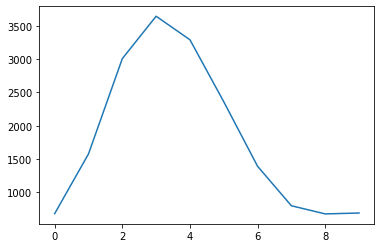

In [110]:
plt.plot(history.history['loss'])

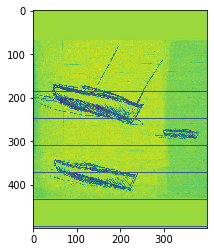

In [93]:
plt.imshow(X[2,:,:,:].reshape(500,400))

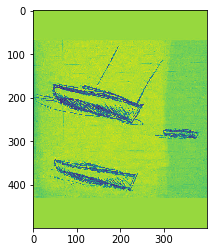

In [94]:
plt.imshow(y[2,:,:,:].reshape(500,400))

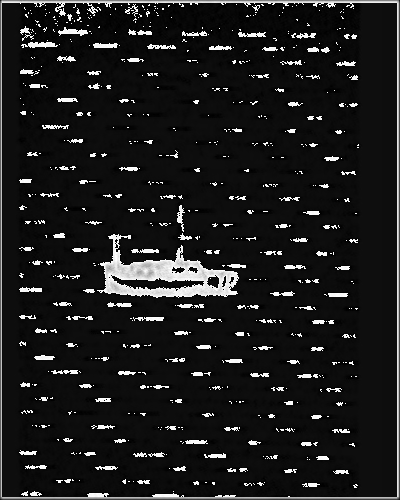

In [111]:
# result = model.predict(np.array([X]))
result = autoencoder.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

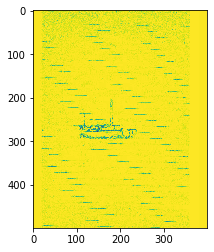

In [112]:
plt.imshow(image_to_predict.reshape(500,400))

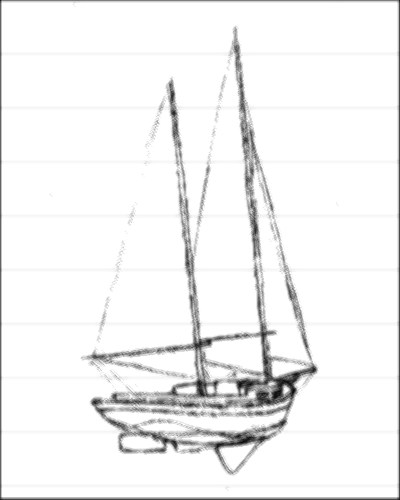

In [113]:
result = autoencoder.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

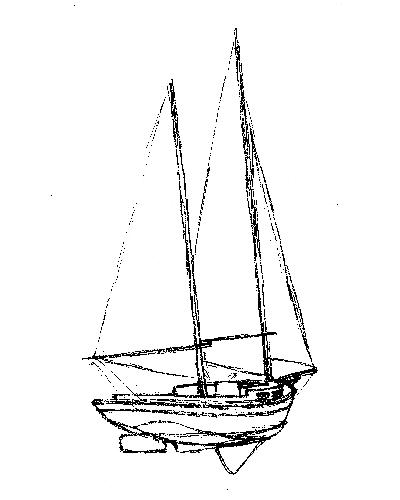

In [107]:
Image.fromarray(y[0].astype(np.uint8).reshape(500,400))

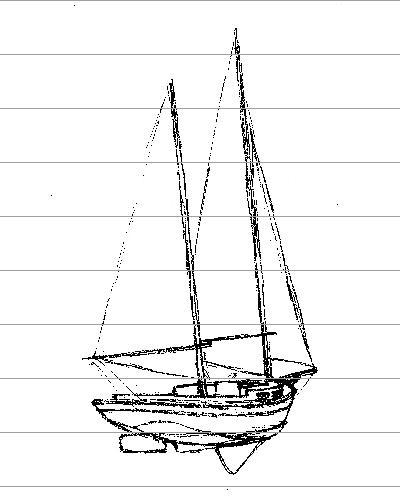

In [108]:
Image.fromarray(X[0].astype(np.uint8).reshape(500,400))

In [102]:
autoencoder.predict(X).min()

1.1400253

In [103]:
autoencoder.predict(X).max()

277.6911

In [ ]:
np.astype(auto)

In [ ]:
#!tensorboard --logdir=logs


In [ ]:
# input_img = Input(shape=input_shape)
# x = Conv2D(256, 2, activation="swish", padding="same")(input_img)
# x = BatchNormalization()(x)
# x = Conv2D(128, 1, activation="swish", padding="same")(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="linear", padding="same")(x)
# x = BatchNormalization()(x)
# encoded = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# # x = UpSampling2D(2)(x)
# # x = Dropout(0.5)(x)
# x = Conv2D(128, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(256, 2, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# decoded = Conv2D(1, 1, activation="linear", padding='same')(x)
# autoencoder = Model(input_img, decoded)
# autoencoder.summary()

In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
